<a href="https://colab.research.google.com/github/Subburockz/Subburockz/blob/main/Online_Retail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Online Retail.csv")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df1=df.copy()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df1.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.drop(columns=['Description','CustomerID'],inplace=True,axis=1)


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [ ]:
# what is the unit price of the products in different countries
unit_price_of_products = df1.groupby('Country')['UnitPrice'].size().reset_index().head(10).sort_values('UnitPrice')
unit_price_of_products

,Country,UnitPrice
2,Bahrain,19
8,Czech Republic,30
4,Brazil,32
5,Canada,151
9,Denmark,389
1,Austria,401
7,Cyprus,622
6,Channel Islands,758
0,Australia,1259
3,Belgium,2069


In [ ]:
# Analyze the sales trends over time.Identify the busiest months and days of the week in terms of sales.
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# what is the quantity of the products sold in different countries
Quantity_sold = df1.groupby('Country')['Quantity'].size().reset_index().sort_values('Quantity').head(10)
Quantity_sold

,Country,Quantity
29,Saudi Arabia,10
2,Bahrain,19
8,Czech Republic,30
4,Brazil,32
22,Lithuania,35
21,Lebanon,45
28,RSA,58
11,European Community,61
35,United Arab Emirates,68
23,Malta,127


In [ ]:
df1['Quantity'].nunique()

722

In [ ]:
# what was the mean of the quantity sold in different countries?
sum_Quantity = df1['Quantity'].head(722).sum()
sum_Quantity

9305

In [ ]:
mean_Quantity = sum_Quantity/722
mean_Quantity

12.887811634349031

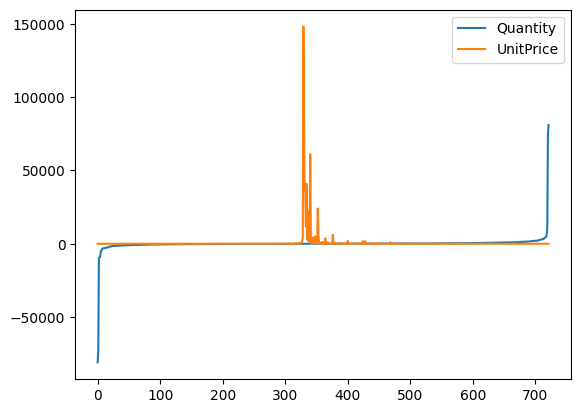

In [ ]:
# what was the unit price in different countries for the quantity sold and plot it
Quantity_sold= df1.groupby('Quantity')['UnitPrice'].size().reset_index().plot()


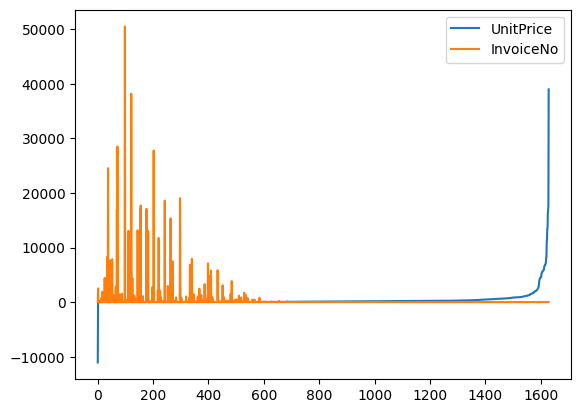

In [ ]:
# what was the invoiceno in different countries for the unitprice and plot it
UnitPrice = df1.groupby('UnitPrice')['InvoiceNo'].size().reset_index().plot()


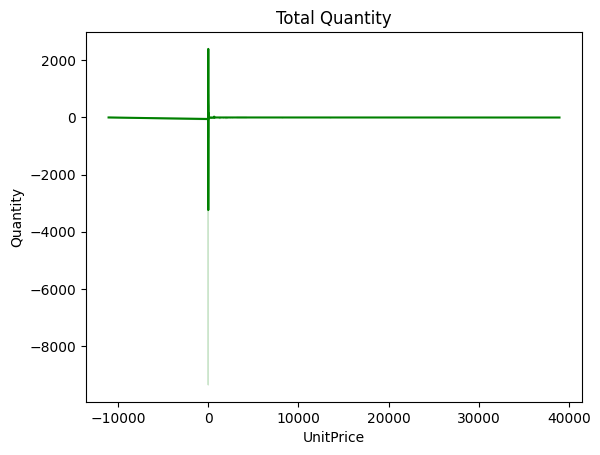

In [ ]:
sns.lineplot(x ='UnitPrice',y ='Quantity',data = df1, color = 'green')
plt.title('Total Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
Quantity = df1.groupby('Quantity')['UnitPrice'].size().reset_index()
Quantity

,Quantity,UnitPrice
0,-80995,1
1,-74215,1
2,-9600,2
3,-9360,1
4,-9058,1
...,...,...
717,4800,1
718,5568,1
719,12540,1
720,74215,1


In [ ]:
mean_cancellations = df1.groupby("Country").agg({"UnitPrice":"size","Quantity":"mean"}).reset_index()
mean_cancellations


,Country,UnitPrice,Quantity
0,Australia,1259,66.444003
1,Austria,401,12.037406
2,Bahrain,19,13.684211
3,Belgium,2069,11.189947
4,Brazil,32,11.125000
5,Canada,151,18.298013
6,Channel Islands,758,12.505277
7,Cyprus,622,10.155949
8,Czech Republic,30,19.733333
9,Denmark,389,21.048843


In [ ]:
new_columns = df1[['UnitPrice','Quantity','Country']].head(20)
new_columns

,UnitPrice,Quantity,Country
0,2.55,6,United Kingdom
1,3.39,6,United Kingdom
2,2.75,8,United Kingdom
3,3.39,6,United Kingdom
4,3.39,6,United Kingdom
5,7.65,2,United Kingdom
6,4.25,6,United Kingdom
7,1.85,6,United Kingdom
8,1.85,6,United Kingdom
9,1.69,32,United Kingdom


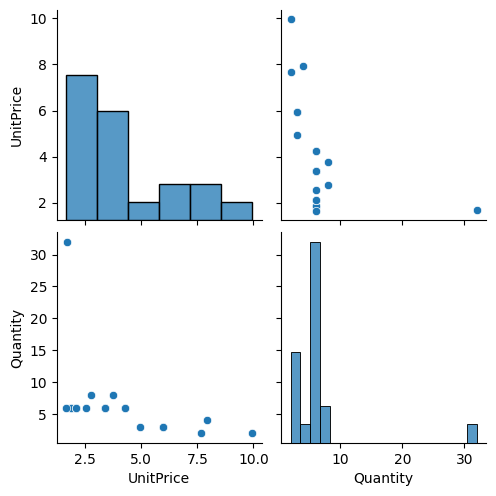

In [ ]:
sns.pairplot(data=new_columns)

<Axes: ylabel='Quantity'>

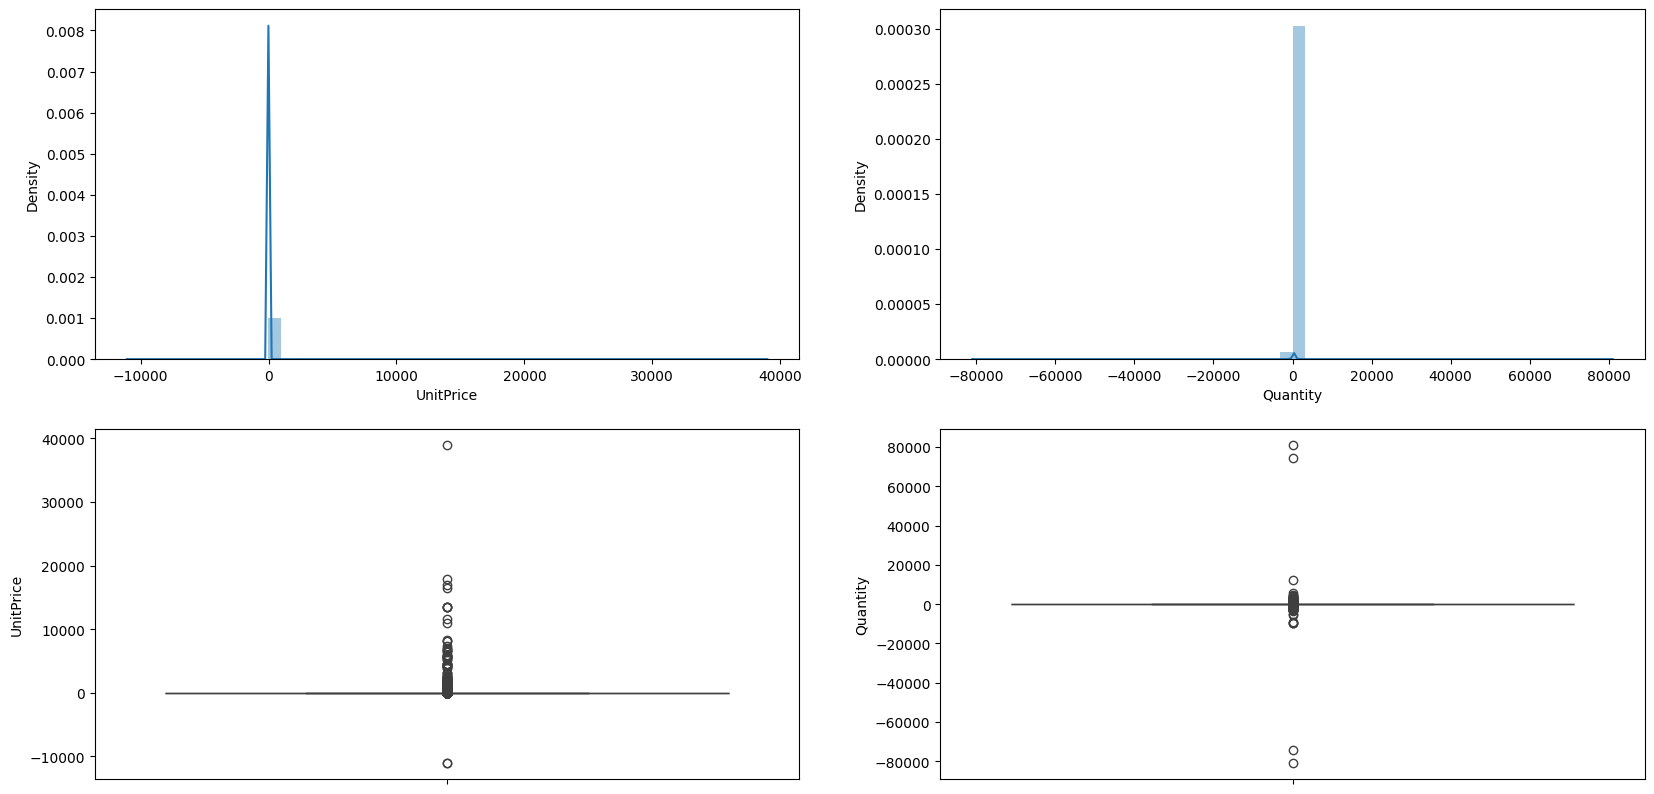

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['UnitPrice'])
plt.subplot(2,2,2)
sns.distplot(df['Quantity'])
plt.subplot(2,2,3)
sns.boxplot(df['UnitPrice'])
plt.subplot(2,2,4)
sns.boxplot(df['Quantity'])

<Axes: xlabel='UnitPrice', ylabel='Density'>

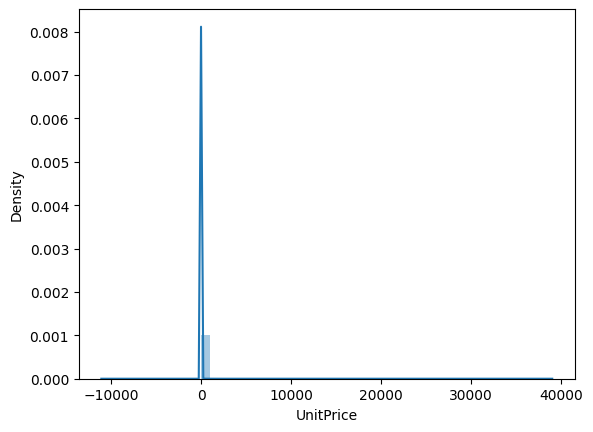

In [ ]:
sns.distplot(df['UnitPrice'])

Text(0.5, 0.98, 'Quantity of Sales Vs Month')

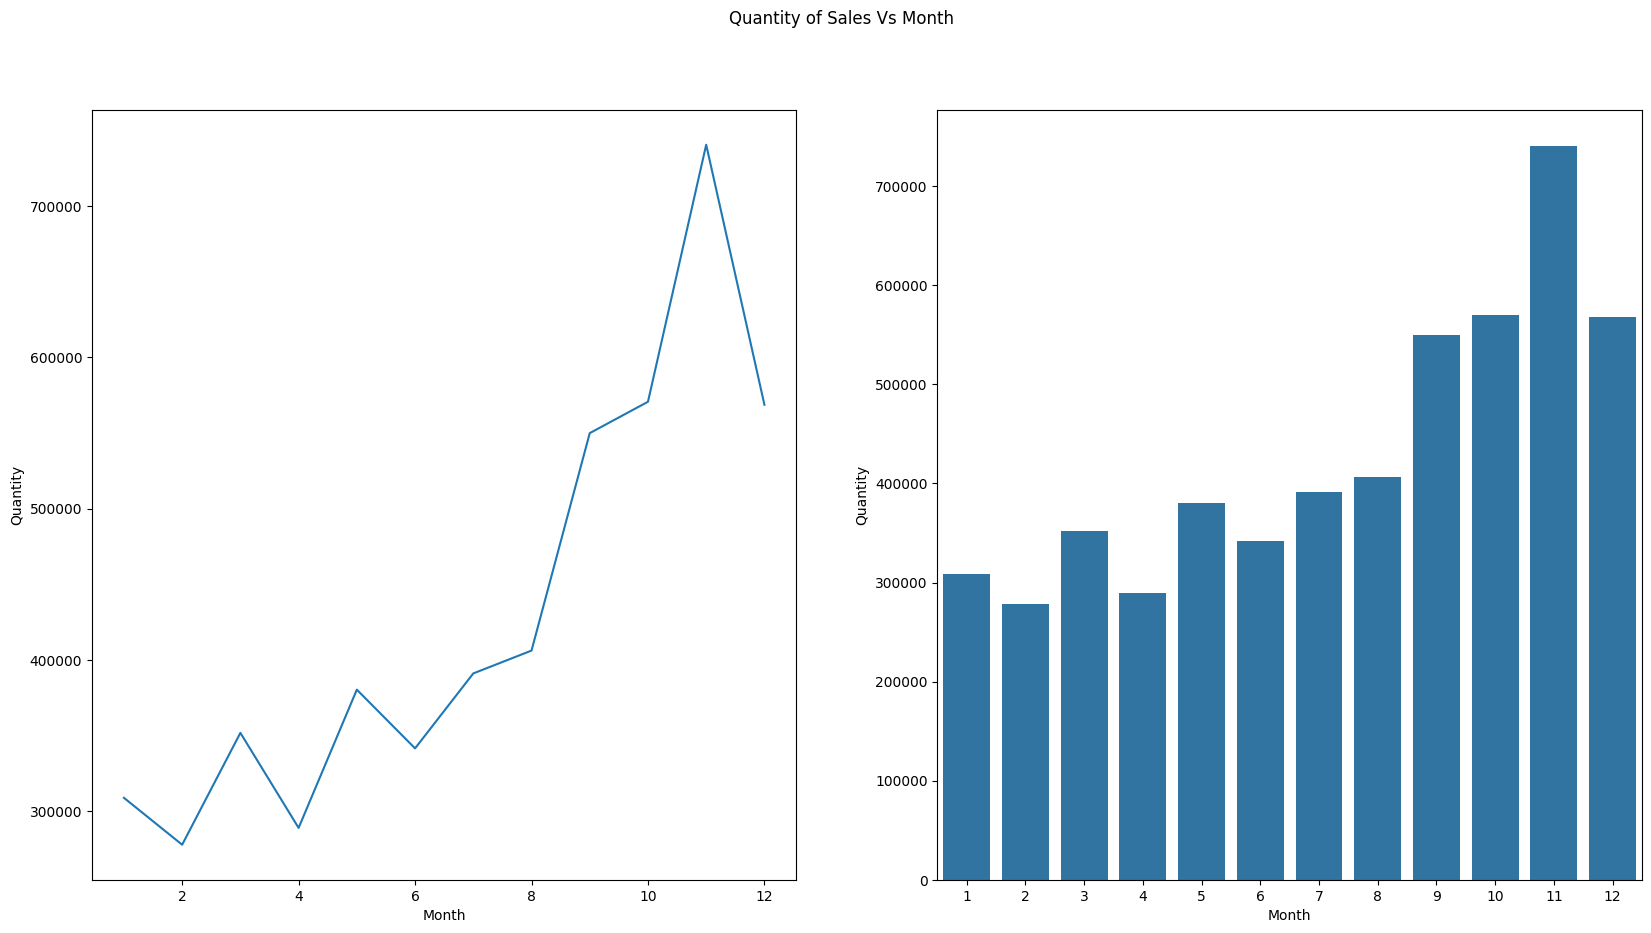

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month
x=df.groupby('Month').Quantity.sum().reset_index().iloc[:,0]
y=df.groupby('Month').Quantity.sum().reset_index().iloc[:,1]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(x=x,y=y)
plt.subplot(1,2,2)
sns.barplot(x=x,y=y)
plt.suptitle('Quantity of Sales Vs Month')

In [ ]:
df['InvDay'] = df['InvoiceDate'].dt.day

Text(0.5, 0.98, 'Quantity of sales Vs Day for entire year')

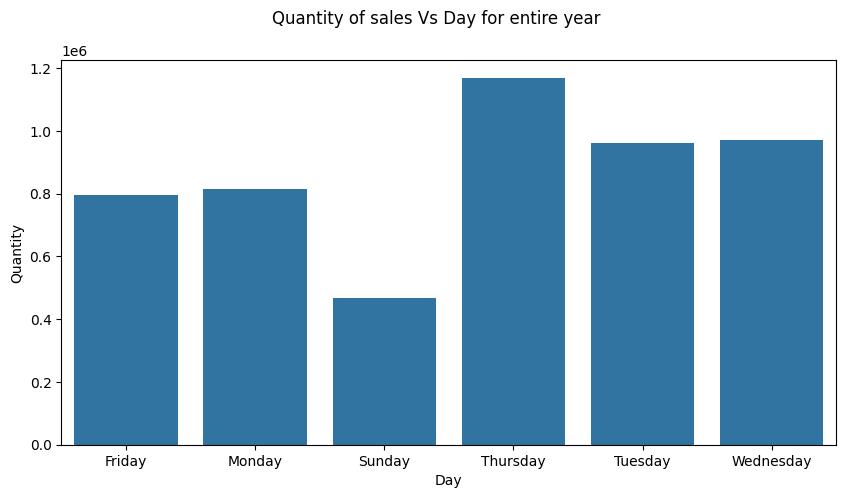

In [ ]:
df2=df.copy()
df2['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df2['Day']=df2['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10,5))
x=df2.groupby('Day').Quantity.sum().reset_index().iloc[:,0]
y=df2.groupby('Day').Quantity.sum().reset_index().iloc[:,1]
sns.barplot(x=x,y=y)
plt.suptitle('Quantity of sales Vs Day for entire year')

Text(0.5, 0.98, 'Quantity of sales Vs Day for each Day trends')

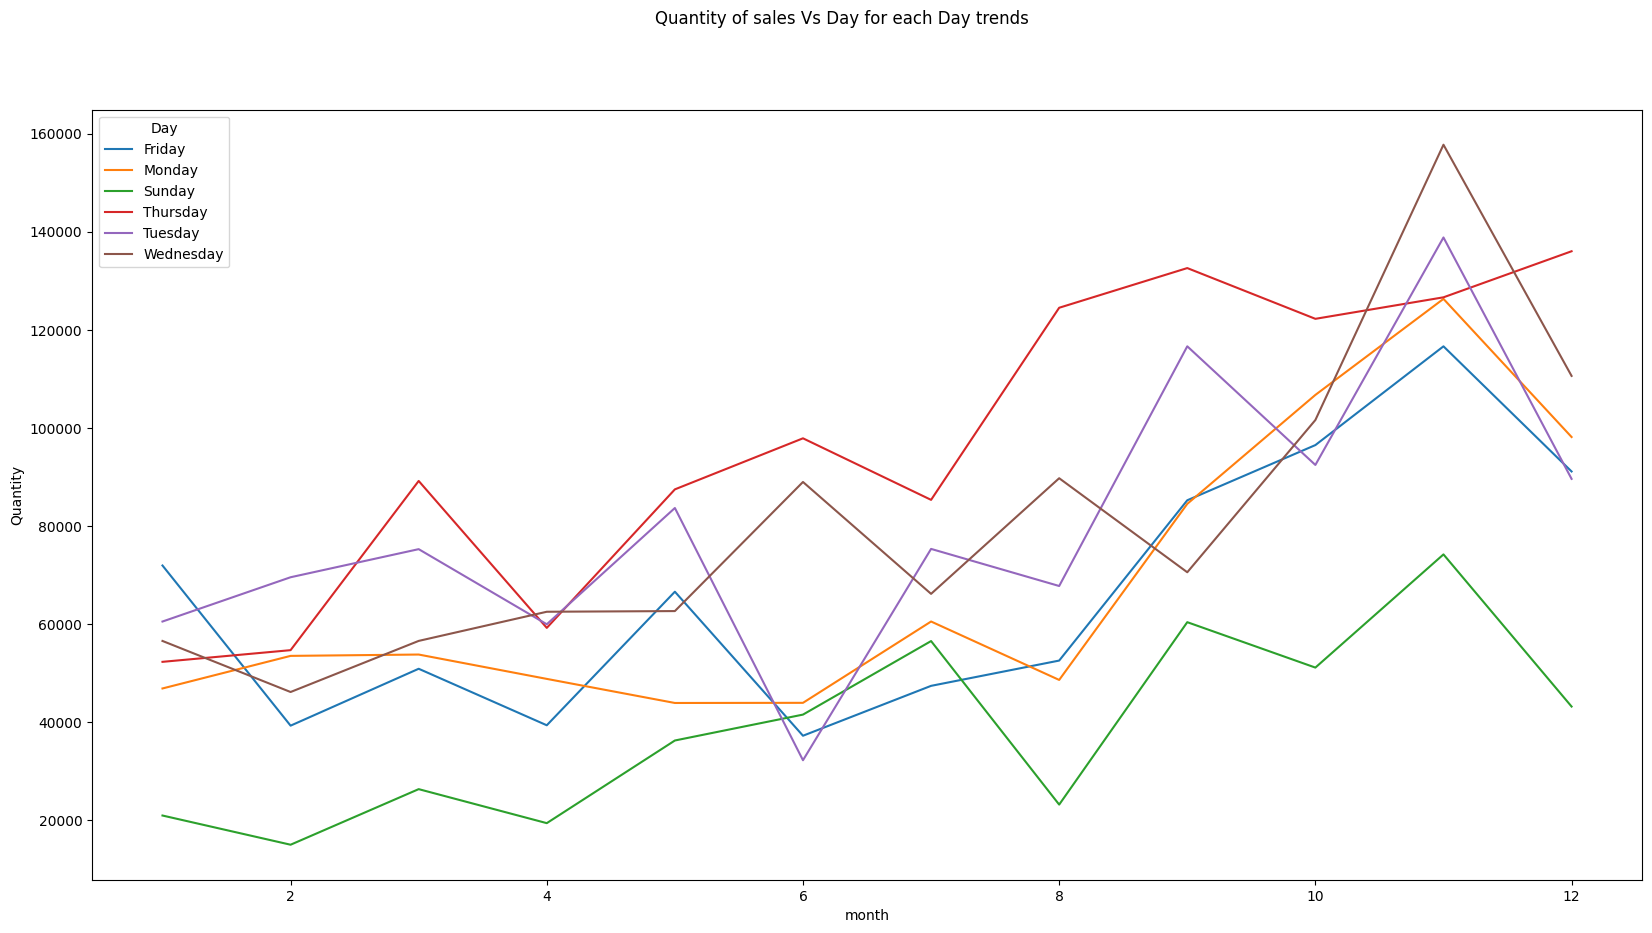

In [ ]:
df2['month']=df2['InvoiceDate'].dt.month
df3=df2.groupby(['Day','month']).Quantity.sum().reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=df3,x='month',y='Quantity',hue='Day')
plt.suptitle('Quantity of sales Vs Day for each Day trends')

Text(0.5, 0.98, 'Quantity of sales Vs Country')

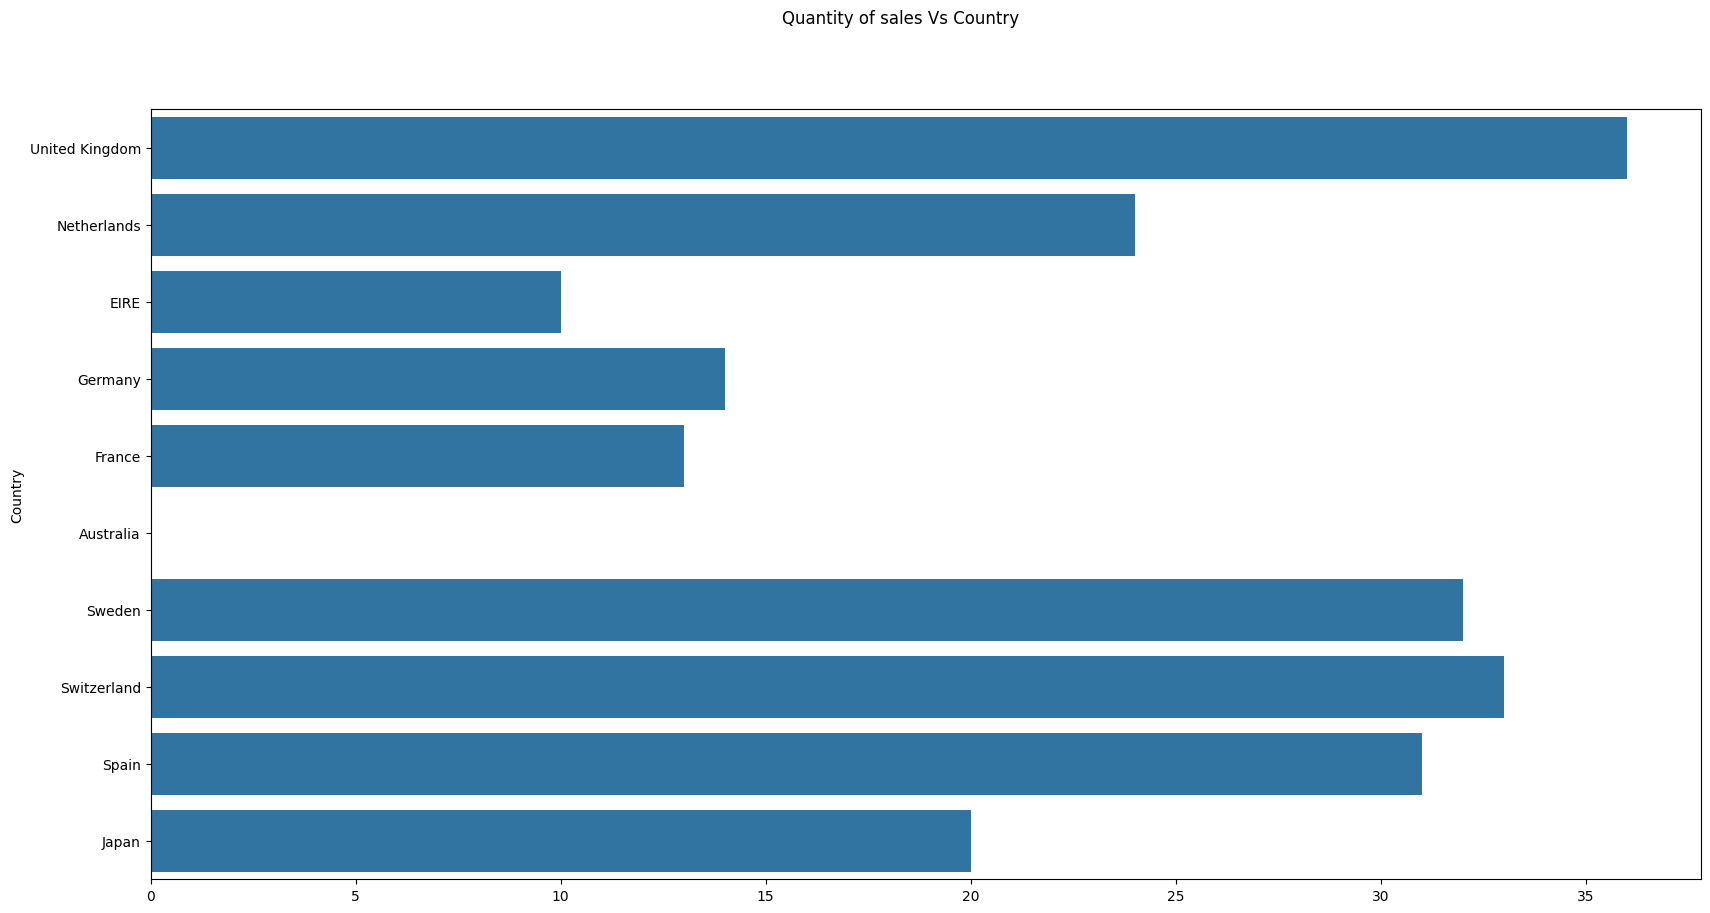

In [ ]:
df1=df.groupby(['Country']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
plt.figure(figsize=(20,10))
x=df1.Country
y=df1.iloc[:,1]
sns.barplot(x[:10])
plt.xticks()
plt.suptitle('Quantity of sales Vs Country')

Text(0.5, 0.98, 'Quantity of sales Vs StockCode')

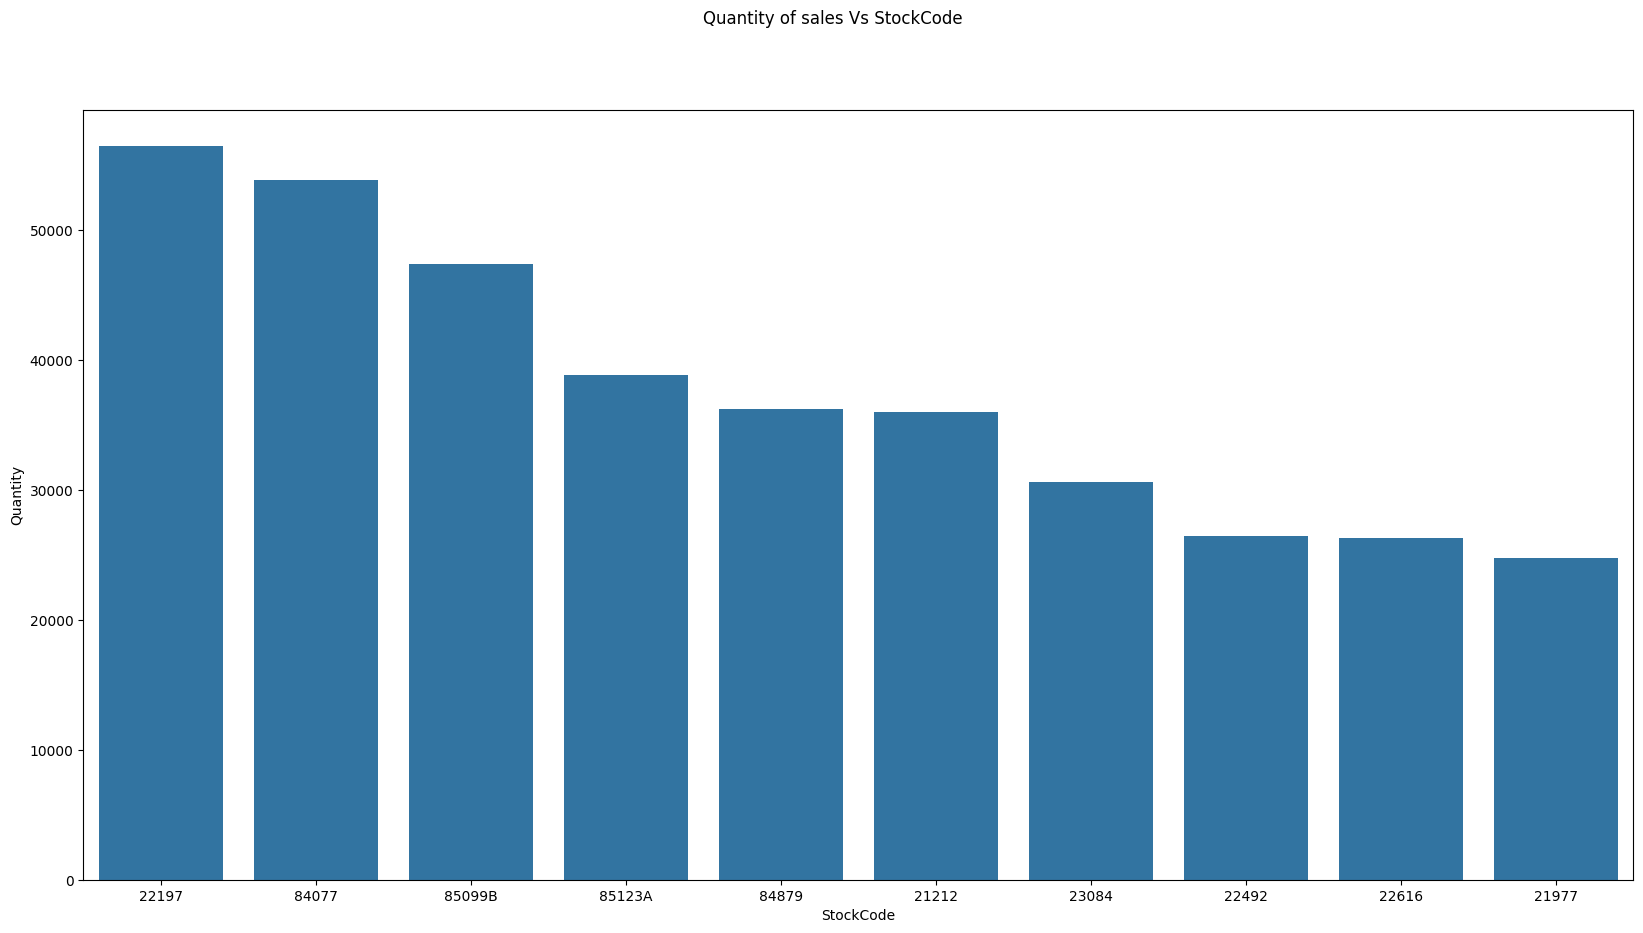

In [ ]:
df1=df.groupby(['StockCode']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
plt.figure(figsize=(20,10))
x=df1.StockCode
y=df1.iloc[:,1]
sns.barplot(y=y[:10],x=x[:10])
plt.suptitle('Quantity of sales Vs StockCode')

Text(0.5, 0.98, 'Quantity of sales Vs StockCode for top 50 countries')

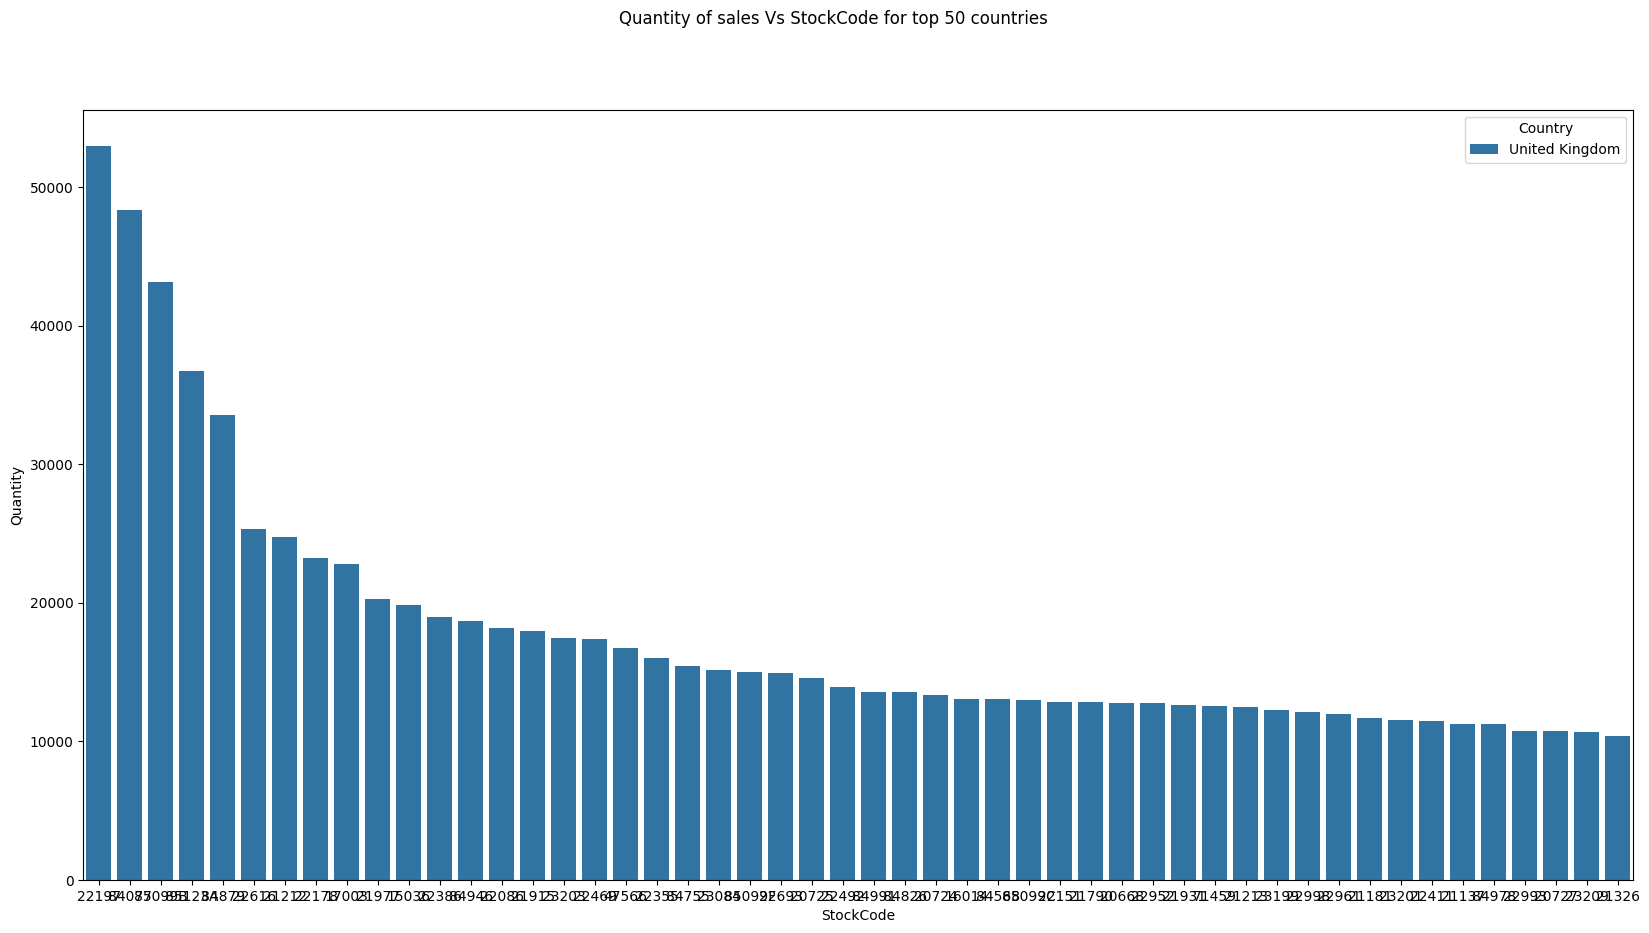

In [ ]:
df1=df.groupby(['Country','StockCode']).Quantity.sum().reset_index().sort_values(by=['Quantity'],ascending=False)
plt.figure(figsize=(20,10))
x=df1.StockCode
y=df1.iloc[:,2]
sns.barplot(x=df1.StockCode[:50], y=df1.iloc[:, 2][:50], hue=df1.Country[:50])
plt.xticks()
plt.suptitle('Quantity of sales Vs StockCode for top 50 countries')

In [ ]:
print(df.head(2))
print(df.shape)

  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55   
1    536365     71053         6 2010-12-01 08:26:00       3.39   

          Country  Month  InvDay  
0  United Kingdom     12       1  
1  United Kingdom     12       1  
(541909, 8)


In [ ]:
q1=df['Quantity'].quantile(0.25)
q3=df['Quantity'].quantile(0.75)
iqr=q3-q1
df=df.loc[~((df.Quantity<q1-1.5*iqr)|(df.Quantity>q3+1.5*iqr))]
df.shape

(483290, 8)

In [ ]:
q1=df['UnitPrice'].quantile(0.25)
q3=df['UnitPrice'].quantile(0.75)
iqr=q3-q1
df=df.loc[~((df.UnitPrice<q1-1.5*iqr)|(df.UnitPrice>q3+1.5*iqr))]
df.shape

(450820, 8)

<Axes: ylabel='Quantity'>

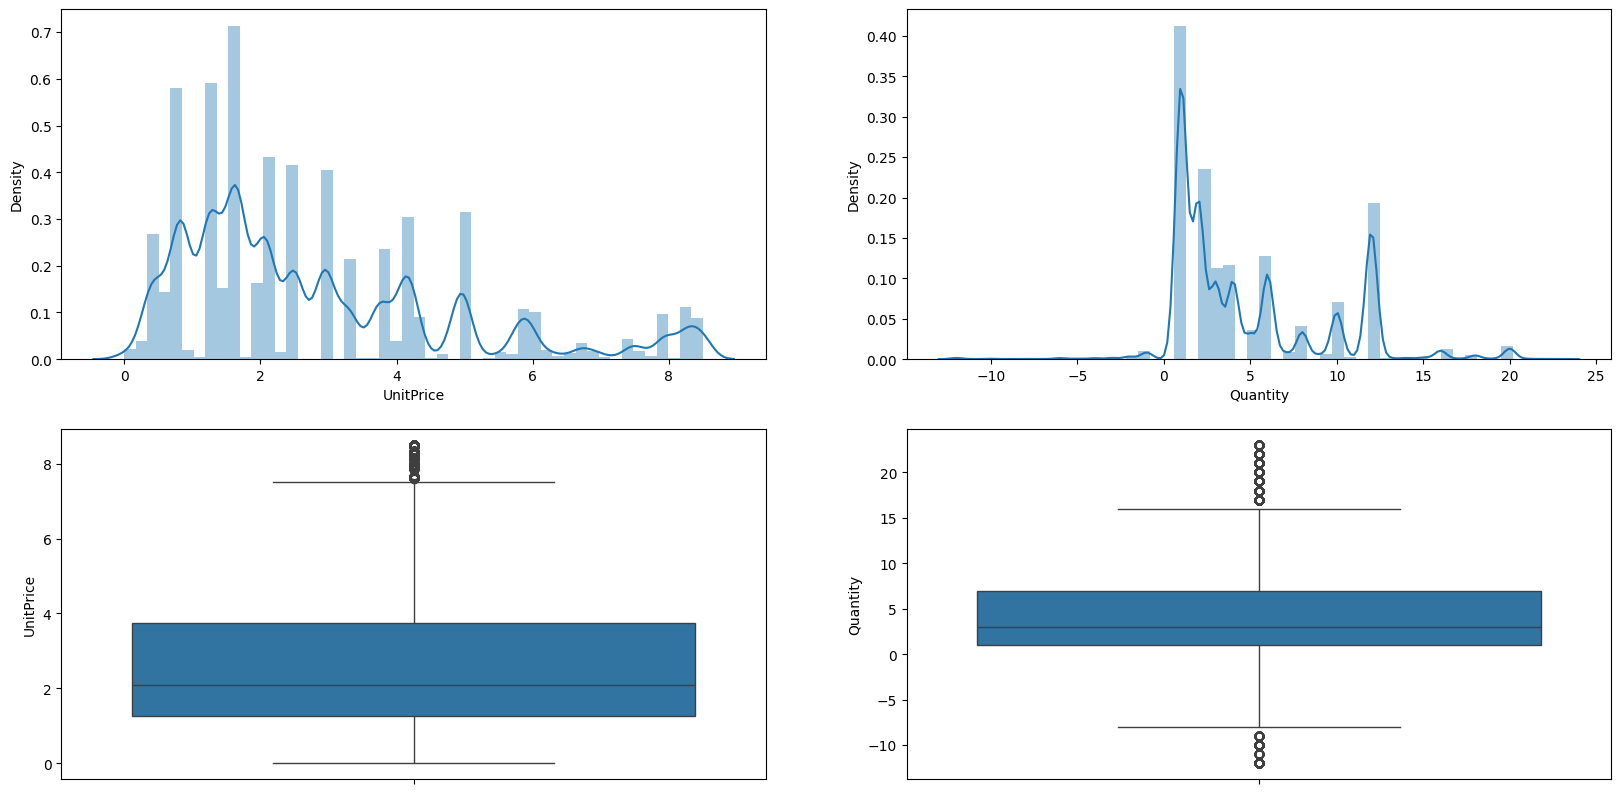

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['UnitPrice'])
plt.subplot(2,2,2)
sns.distplot(df['Quantity'])
plt.subplot(2,2,3)
sns.boxplot(df['UnitPrice'])
plt.subplot(2,2,4)
sns.boxplot(df['Quantity'])

Text(0.5, 0.98, 'Quantity of Sales Vs Month')

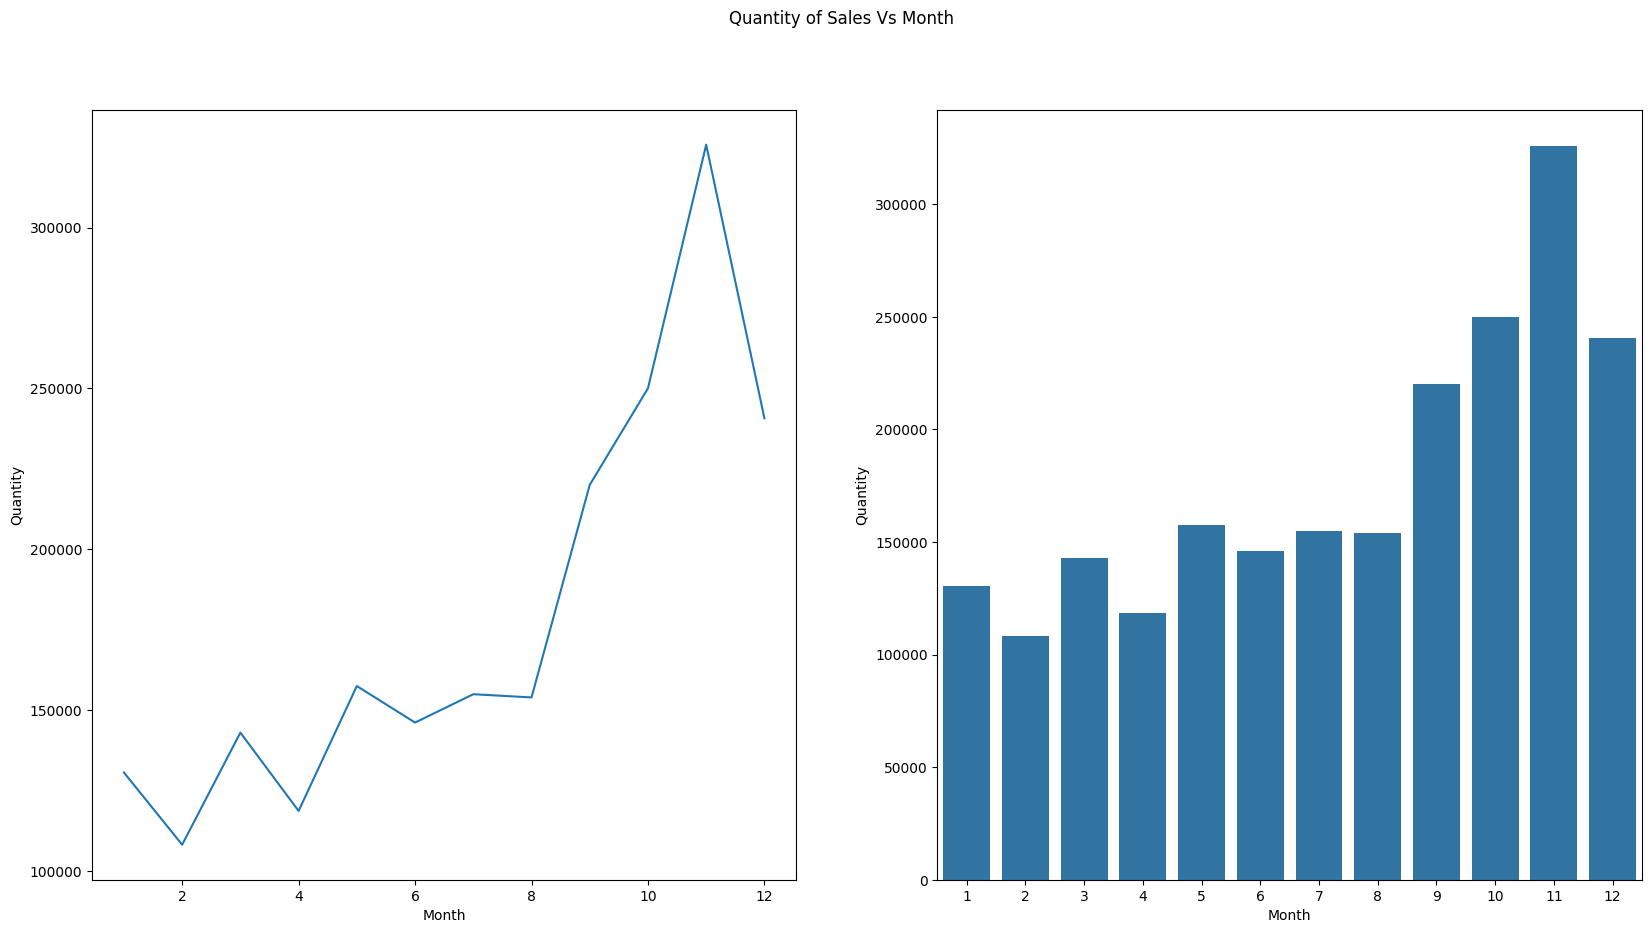

In [ ]:
df2=df.copy()
df2['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df2['Month']=df2['InvoiceDate'].dt.month
x=df2.groupby('Month').Quantity.sum().reset_index().iloc[:,0]
y=df2.groupby('Month').Quantity.sum().reset_index().iloc[:,1]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(x=x,y=y)
plt.subplot(1,2,2)
sns.barplot(x=x,y=y)
plt.suptitle('Quantity of Sales Vs Month')

Text(0.5, 0.98, 'Quantity of sales Vs Day for entire year')

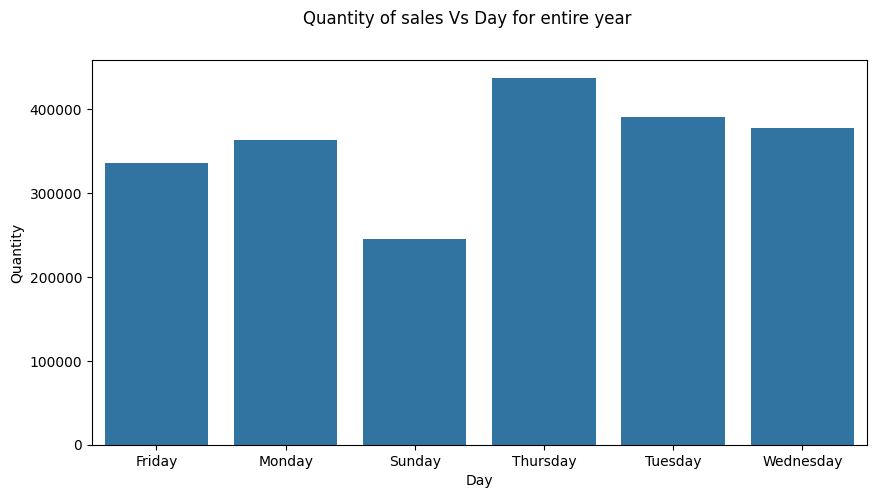

In [ ]:
df2=df.copy()
df2['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df2['Day']=df2['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10,5))
x=df2.groupby('Day').Quantity.sum().reset_index().iloc[:,0]
y=df2.groupby('Day').Quantity.sum().reset_index().iloc[:,1]
sns.barplot(x=x,y=y)
plt.suptitle('Quantity of sales Vs Day for entire year')

Text(0.5, 0.98, 'Quantity of sales Vs Day for each Day trends')

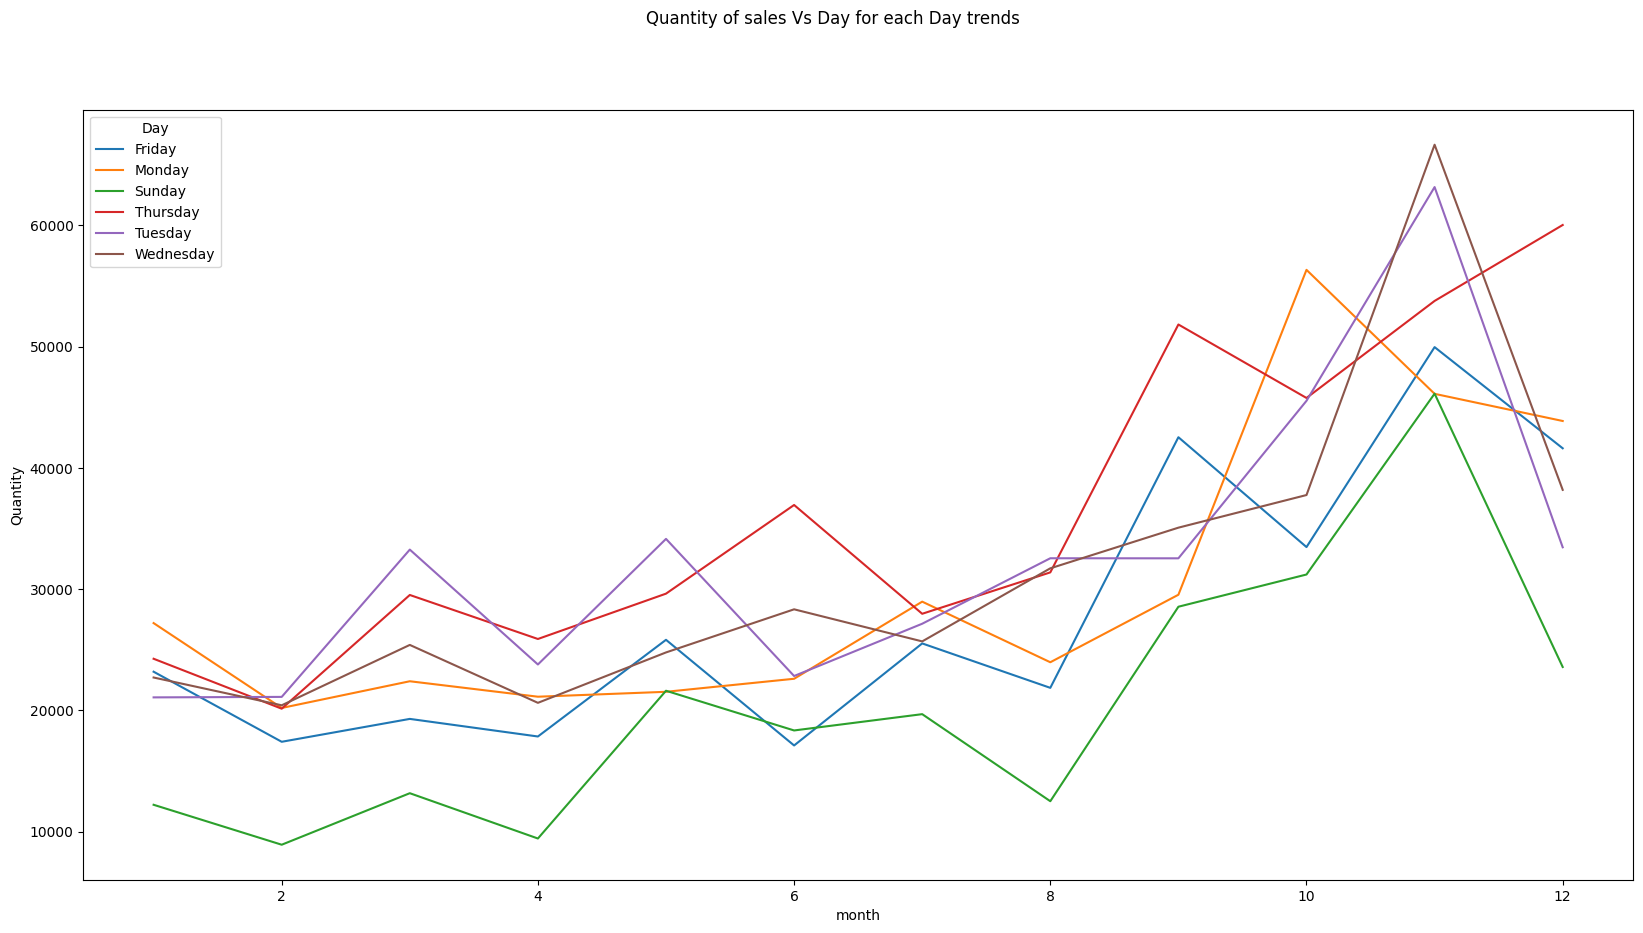

In [ ]:
df2['month']=df2['InvoiceDate'].dt.month
df3=df2.groupby(['Day','month']).Quantity.sum().reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=df3,x='month',y='Quantity',hue='Day')
plt.suptitle('Quantity of sales Vs Day for each Day trends')

In [ ]:
Conclusions:

From the Quantity of Sales Vs Month plot:
Overall increasing trend in sales from the first to the eleventh month
Slight decreases in sales at the 3rd and 4th months
Rapid decrease in sales at the 11th and 12th months

From the Quantity of Sales Vs Day plot:
High business on Thursdays
Business is slower on holidays like Sundays compared to all the other days

From the Quantity of Sales Vs Month for each day trends plot:
High business on Thursdays throughout all the months, except in the 11th month when Saturday sees high business

From the Quantity of Sales Vs Country plot:
The UK is the top country in terms of the quantity of products sold, with approximately 22 times more sales than the second-highest country, the Netherlands

From the Quantity of Sales Vs Stockcode plot:
The top five products are: 84077,22197,85099B,85123A,21212

From the Quantity of Sales Vs Stockcode for top 50 countries plot:
All of the top 50 products are predominantly purchased by customers in the UK

From the Quantity of Sales Vs Country best customer plot:
Identified the top customer from the Netherlands with Customer ID 14646, who made a significant number of purchases

After removing Outliers:
Identified and removed outliers from the data.
Noted changes in the UnitPrice,Quantity features and their distribution
Observed that the trend analysis remained consistent even after outlier removal

Summary of Key Findings:

Sales Trends:
Sales showed an overall increasing trend from the first to the eleventh month. Slight decreases in sales were observed in the 3rd and 4th months, while sales rapidly decreased in the 11th and 12th months

Day of the Week Impact:
Thursdays consistently had the highest business activity throughout the year. Sundays, as holidays, had significantly lower business activity.

Monthly Trends by Day:
In most months, Thursdays were associated with high business activity. In the 11th month, Saturdays saw a surge in business

Top Countries:
The United Kingdom (UK) emerged as the top country, with approximately 22 times more product sales than the second-highest country, the Netherlands.

Top Selling Products:
The top five products are: 84077,22197,85099B,85123A,21212

Country-Specific Sales:
The top 50 products were primarily purchased by customers in the UK

Best Customer:
The top customer, located in the Netherlands with Customer ID 14646, made a significant number of purchases

Outliers and Data Distribution:
Outliers were identified and removed from the dataset. The UnitPrice feature showed changes in its distribution after outlier removal, but trend analysis remained consistent

Recommendations:
Give reasonable discounts on holidays to attract the customers
Exapnd the branches in UK region and next netherlands
Give small prizes to top customers to attract the business
Try to avoid the return stocks
